In [1]:
import pandas as pd
import numpy as np

In [2]:
subscribers = pd.read_pickle('subscribers')
engagement = pd.read_pickle('engagement')
df_cus = pd.read_pickle('customer_service_reps')

In [34]:
subscribers.head()
#need the last payment column



,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0,0.0367,ar,False,False,NaN


In [21]:
engagement
engagement_new = engagement.drop(columns = "subid",axis = 1)
engagement_new

,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
28832315,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [92]:
df_cus.head()

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN


# Customer Segmentation

In [66]:
df1 = subscribers[['subid','weekly_consumption_hour',"num_ideal_streaming_services",'age','join_fee']]
#'package_type','preferred_genre'

In [67]:

df1['weekly_consumption_hour'].fillna(value=df1["weekly_consumption_hour"].mean(),inplace = True)
df1["num_ideal_streaming_services"].fillna(value=df1["num_ideal_streaming_services"].mean(),inplace = True)

for i in range(len(df1)):
    if len(str(int(df1.iloc[i,2]))) == 3:
        df1.iloc[i,2] = 100
    elif df1.iloc[i,2]>1600 and df1.iloc[i,2]<2021:
        df1.iloc[i,2] = 2020 - df1.iloc[i,2]
    elif len(str(int(df1.iloc[i,2]))) >= 4:
        df1.iloc[i,2] = 100
    elif df1.iloc[i,2] < 12:
        df1.iloc[i,2] = 12


df1["join_fee"].fillna(value = df1["join_fee"].mean(), inplace = True)
df1["age"].fillna(value= df1["age"].mean(), inplace = True)

/Users/jaimexiang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
/Users/jaimexiang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#df1['package_type'].fillna(value='other_package',inplace = True)
#df1['preferred_genre'].fillna(value='other',inplace = True)


In [53]:
#print(df1["weekly_consumption_hour"].mean())

27.99772410829662


In [70]:
df1_input = df1.drop('subid',axis = 1)
df1_input.head()

,weekly_consumption_hour,num_ideal_streaming_services,age,join_fee
162502,27.997724,12.0,757.975457,0.115145
380374,22.951579,12.0,70.000000,0.330300
496617,36.001186,12.0,25.000000,0.110100
356799,20.051667,12.0,30.000000,0.036700
681701,22.951579,12.0,28.000000,0.036700


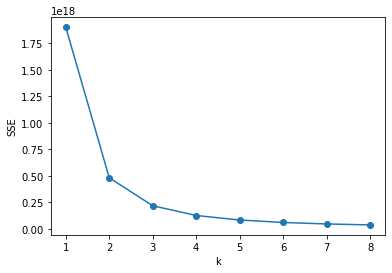

<Figure size 432x288 with 0 Axes>

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
SSE = []
for k in range(1, 9):
    estimator = KMeans(n_clusters=k)
    estimator.fit(df1)
    SSE.append(estimator.inertia_)
X = range(1, 9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X, SSE, 'o-')
plt.show()

plt.savefig('./elbow.jpg', dpi=1000)

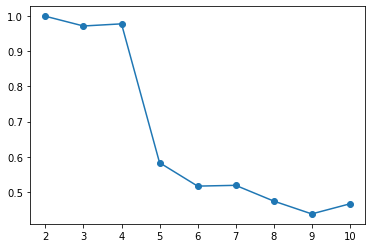

In [71]:
#silhouette_score
from sklearn.metrics import silhouette_score

index = []
silhouette = []
sample = df1_input.sample(n=5000)
for i in range(9):
    model = KMeans(n_clusters=i+2)
    model.fit(sample)
    index.append(i+2)
    silhouette.append(silhouette_score(sample, model.labels_))
    
plt.plot(index, silhouette, '-o')
plt.savefig('./silhourtte.jpg', dpi=1000)

In [73]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit_predict(df1_input)
kmeans_model.cluster_centers_

array([[2.79977616e+01, 1.20000000e+01, 2.03084994e+02, 1.15143582e-01],
       [2.29515795e+01, 1.20000000e+01, 8.17200000e+07, 3.67000000e-02],
       [2.73014483e+01, 1.20000000e+01, 8.91796500e+06, 2.12860000e-01]])

# Budget Allocation

In [80]:
channel = pd.read_csv("channel_spend_graduate.csv")

In [81]:
channel.head()

,channel,date,spend_AED
0,bing,201907,400
1,display,201907,12
2,facebook,201907,9000
3,search,201907,13000
4,youtube,201907,90


In [82]:
type(subscribers)
newSubscribers = pd.read_csv("subscribers.csv")
newSubscribers.head()
newSubscribers.drop("Unnamed: 0", axis = 1, inplace = True)
newSubscribers.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,trial_end_date,initial_credit_card_declined,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,2020-02-07 21:44:16,False,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,2020-03-15 15:44:35,False,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,2019-12-21 16:37:06,False,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,2020-02-10 16:09:32,False,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,2019-10-19 12:57:07,False,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [85]:
def time_transform(timestr):
    timeback = timestr[0:4]+timestr[5:7]
    return timeback

In [86]:
#now we need the users' revenue to do the allocation
df = newSubscribers[["attribution_technical","account_creation_date", "payment_period"]]

In [87]:
df['account_creation_date'] = df['account_creation_date'].map(lambda x: time_transform(str(x)))
newSubscribers['account_creation_date'] = newSubscribers['account_creation_date'].map(lambda x: time_transform(str(x)))

<ipython-input-87-aed6bfc298d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['account_creation_date'] = df['account_creation_date'].map(lambda x: time_transform(str(x)))


In [89]:
TheListOfChannel = list(channel["channel"].unique())
TheListOfDate = list(channel["date"].unique())
customer = {}
for i in TheListOfDate:
    customer[str(i)] = {x:0 for x in TheListOfChannel}

for a in df.index:
    if (df.loc[a, 'attribution_technical'] in channel_)&(int(df.loc[a, 'account_creation_date']) in date_list):
        customer[df.loc[a,'account_creation_date']][df.loc[a,'attribution_technical']] += 1

customer = pd.DataFrame(customer)
customer


NameError: name 'channel_list' is not defined

# Churn

In [3]:
subscribers_csv = pd.read_csv("subscribers.csv")
subscribers_csv.drop("Unnamed: 0", axis = 1, inplace = True)
subscribers_csv.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [4]:
columnsDropping = ["subid","country","account_creation_date","trial_end_date","initial_credit_card_declined","language","payment_type","num_trial_days","last_payment","next_payment","cancel_date","trial_completed"]
subscribers_csv.head()

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,country,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,UAE,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,UAE,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,UAE,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,UAE,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,UAE,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [5]:
subscribers_csv['package_type'].fillna(value = 0,inplace = True)
subscribers_csv['num_weekly_services_utilized'].fillna(value = subscribers_csv["num_weekly_services_utilized"].mean(),inplace = True)
subscribers_csv['preferred_genre'].fillna(value = 0,inplace = True)
subscribers_csv['intended_use'].fillna(value = 0,inplace = True)
subscribers_csv['weekly_consumption_hour'].fillna(value = subscribers_csv['weekly_consumption_hour'].mean(),inplace = True)
subscribers_csv['num_ideal_streaming_services'].fillna(value = subscribers_csv['num_ideal_streaming_services'].mean() ,inplace = True)
subscribers_csv['age'].fillna(value = subscribers_csv["age"].mean(),inplace = True)
subscribers_csv['male_TF'].fillna(value = False,inplace = True)
subscribers_csv['op_sys'].fillna(value = 'iOS',inplace = True)
subscribers_csv['join_fee'].fillna(value = subscribers_csv["join_fee"].mean(),inplace = True)

for i in range(len(subscribers_csv)):
    if len(str(int(subscribers_csv.iloc[i,6]))) == 3:
        subscribers_csv.iloc[i,6] = 100
    elif subscribers_csv.iloc[i,6]>1600 and subscribers_csv.iloc[i,6]<2021:
        subscribers_csv.iloc[i,6] = 2020 - subscribers_csv.iloc[i,6]
    elif len(str(int(subscribers_csv.iloc[i,6]))) >= 4:
        subscribers_csv.iloc[i,6] = 100
    elif subscribers_csv.iloc[i,6] < 12:
        subscribers_csv.iloc[i,6] = 12

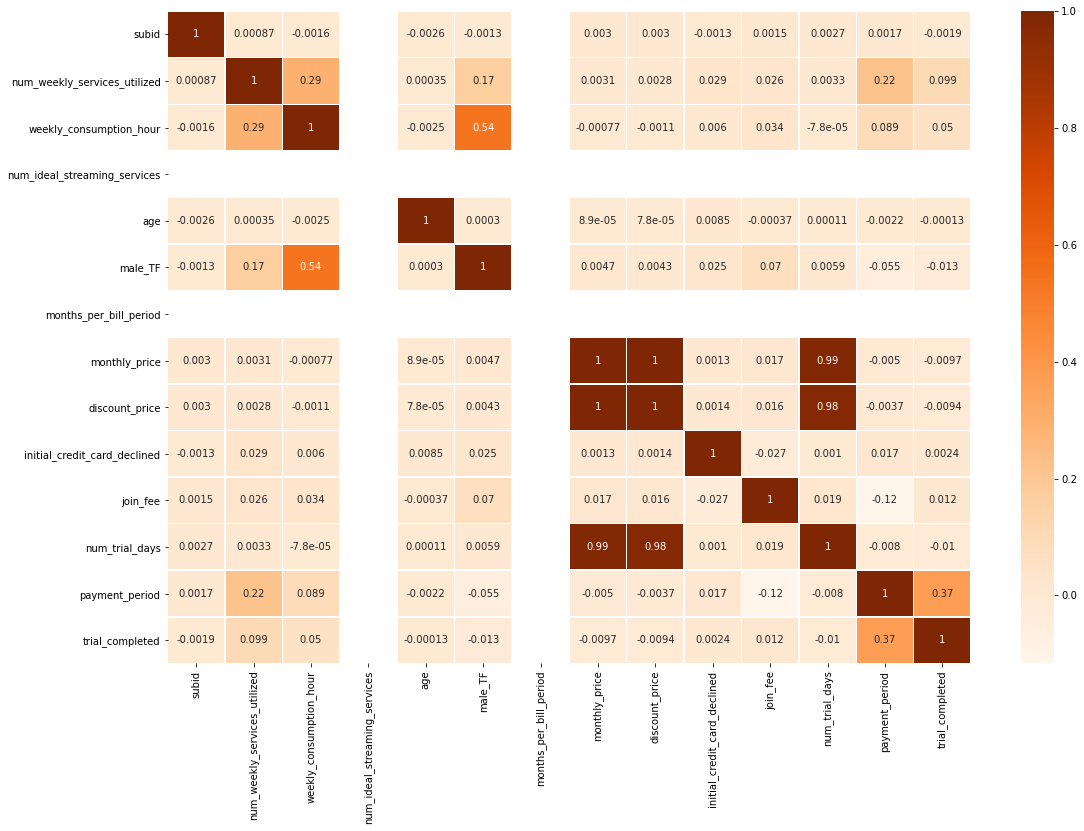

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

user_features=list(subscribers_csv.columns)
user_features.remove('current_sub_TF')

corr_mat=subscribers_csv[user_features].corr()
 
fig,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.savefig('feature_col.jpg',dpi=1000, bbox_inches='tight')

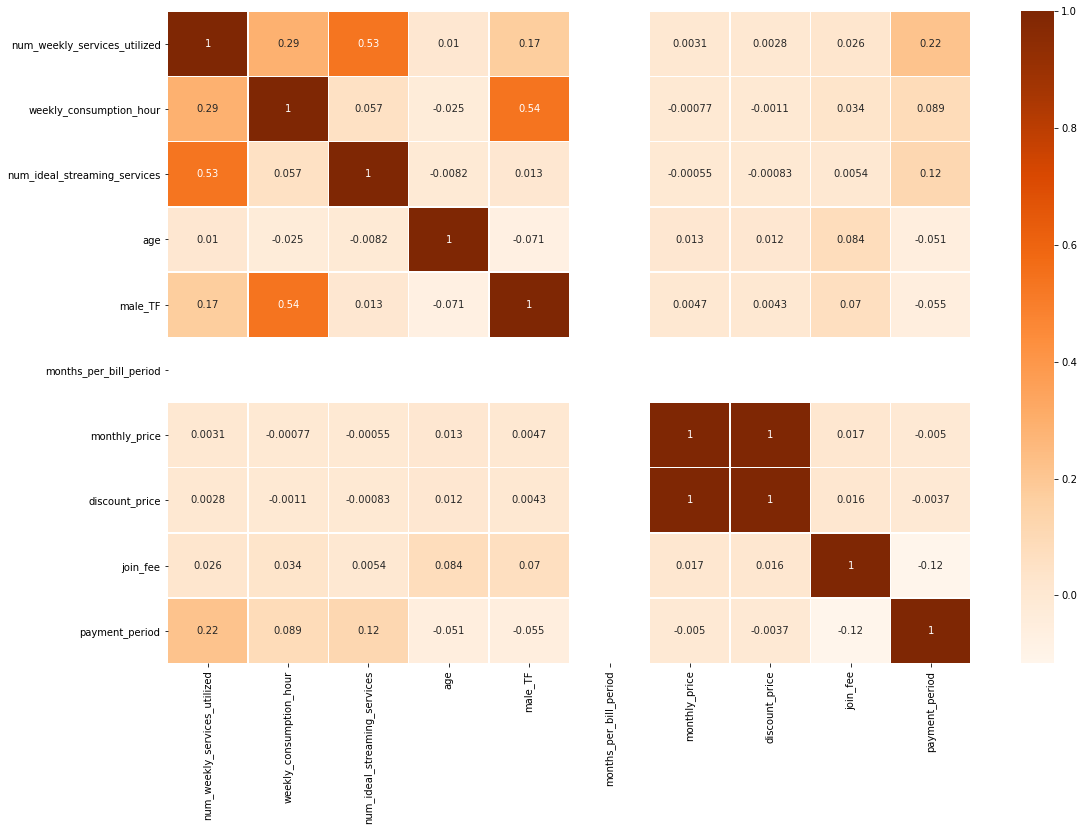

In [119]:
#see the col between features, we will combine simliar feature during the pca move
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

user_features=list(subscribers_csv.columns)
user_features.remove('current_sub_TF')

corr_mat=subscribers_csv[user_features].corr()
 
fig,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.savefig('feature_col.jpg',dpi=1000, bbox_inches='tight')

In [152]:
df_test = subscribers_csv

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  227628 non-null  object 
 2   num_weekly_services_utilized  227628 non-null  float64
 3   preferred_genre               227628 non-null  object 
 4   intended_use                  227628 non-null  object 
 5   weekly_consumption_hour       227628 non-null  float64
 6   num_ideal_streaming_services  227628 non-null  float64
 7   age                           227628 non-null  float64
 8   male_TF                       227628 non-null  bool   
 9   country                       227628 non-null  object 
 10  attribution_technical         227628 non-null  object 
 11  attribution_survey            224984 non-null  object 
 12  op_sys                        227628 non-nul

In [154]:
from sklearn.model_selection import train_test_split, GridSearchCV
 
X_train,X_test,y_train,y_test = train_test_split(df_test.drop('current_sub_TF',axis=1),df_test['current_sub_TF'],test_size= 0.3,random_state=404)

In [143]:
conda install py-xgboost

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/jaimexiang/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    libxgboost-1.1.1           |       h4a8c4bd_0         1.9 MB  conda-forge
    py-xgboost-1.1.1           |   py38h32f6830_0         1.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         conda-forge/o

In [155]:
#XGboost
import xgboost as xgb
 
dtrain=xgb.DMatrix(X_train,y_train)
dtest=xgb.DMatrix(X_test)

params={'booster':'gbtree','objective': 'binary:logistic','eval_metric': 'auc',
    'max_depth':8,'gamma':0,'lambda':2,'subsample':0.7,'colsample_bytree':0.8,
    'min_child_weight':3,'eta': 0.2,'nthread':8,'silent':1}
 
watchlist = [(dtrain,'train')]
bst=xgb.train(params,dtrain,num_boost_round=1000,evals=watchlist)
 
y_prob=bst.predict(dtest)
 
#threshold    
y_pred = (y_prob >= 0.5)*1
 
fpr_xgb,tpr_xgb,threshold_xgb = metrics.roc_curve(y_test,y_prob)   
auc_xgb = metrics.auc(fpr_xgb,tpr_xgb)    
score_xgb = metrics.accuracy_score(y_test,y_pred)    
print('Accuracy:{0},AUC score:{1}'.format(score_xgb,auc_xgb))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

ImportError: cannot import name 'CUDF_INSTALLED' from 'xgboost.compat' (/Users/jaimexiang/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py)

In [116]:
df_test=subscribers_csv

usage = ['num_weekly_services_utilized','num_ideal_streaming_services']
hour = ['weekly_consumption_hour','male_TF']
price = ['monthly_price','discount_price','num_trial_days']
trial = ['payment_period','trial_completed']


dummies_later = ['package_type','preferred_genre','intended_use',"male_TF",'attribution_technical','op_sys','plan_type','payment_type']
df_test = df_test.join(pd.get_dummies(df_test.package_type))
df_test = df_test.join(pd.get_dummies(df_test.preferred_genre))
df_test = df_test.join(pd.get_dummies(df_test.intended_use))
df_test = df_test.join(pd.get_dummies(df_test.attribution_technical))
df_test = df_test.join(pd.get_dummies(df_test.op_sys))
df_test = df_test.join(pd.get_dummies(df_test.plan_type))
df_test = df_test.join(pd.get_dummies(df_test.payment_type))

df_test.drop(dummy_list,axis=1,inplace=True)

ValueError: columns overlap but no suffix specified: Index(['others'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=404)

In [ ]:
#linear regression

In [ ]:
#logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
 
lr = LogisticRegression()                                        
lr.fit(X_train,y_train)                                         
y_prob = lr.predict_proba(X_test)[:,1]                           
y_pred = lr.predict(X_test)                                     
fpr_lr,tpr_lr,threshold_lr = metrics.roc_curve(y_test,y_prob)    
auc_lr = metrics.auc(fpr_lr,tpr_lr)                              
score_lr = metrics.accuracy_score(y_test,y_pred)                 
print('Accuracy:{0},AUC score:{1}'.format(score_lr,auc_lr))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
 
rfc = RandomForestClassifier()                                     
rfc.fit(X_train,y_train)                                           
y_prob = rfc.predict_proba(X_test)[:,1]                            
y_pred=rfc.predict(X_test)                                         
fpr_rfc,tpr_rfc,threshold_rfc = metrics.roc_curve(y_test,y_prob)   
auc_rfc = metrics.auc(fpr_rfc,tpr_rfc)                             
score_rfc = metrics.accuracy_score(y_test,y_pred)     

print('Accuracy:{0},AUC score:{1}'.format(score_rfc,auc_rfc))
print('============================================================')
print(classification_report(y_test,y_pred,labels=None,target_names=None,sample_weight=None, digits=2))

In [ ]:
#ROC curve
plt.style.use('seaborn')
plt.figure(figsize=(18,12))
plt.plot(fpr_lr,tpr_lr,label='Logit: {0:.3f}'.format(score_lr))               
plt.plot(fpr_rfc,tpr_rfc,label='Random Forest:{0:.3f}'.format(score_rfc))             
 
plt.legend(loc='lower right',prop={'size':25})
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.savefig('ROC curve.jpg',dpi=1000, bbox_inches='tight')
plt.show()